In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

# Building an image classifier

In [3]:
keras.__version__

'2.7.0'

In [4]:
tf.__version__

'2.7.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


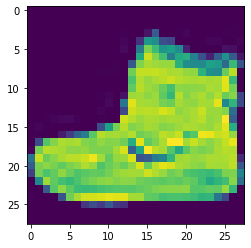

In [6]:
plt.imshow(X_train_full[0])

In [7]:
y_train_full[0]

9

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train_full[1]]

'T-shirt/top'

In [10]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

## Data normalization

In [11]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

#### Splitting data
* Training data - used for training the model
* Validation data - used for tuning the hyperparameters and evaluate the models
* Test data - used to test the model after the model has gone through initial vetting by the validation set.

In [12]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Building the neural network
[28*28 pixel] > [Input layer (ReLu Activation)] > [Hidden layer 1] > [Hidden layer 2] > [Output layer (Softmax Activation)] > [10 categories] 

In [13]:
# Setting random seeds to 42
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


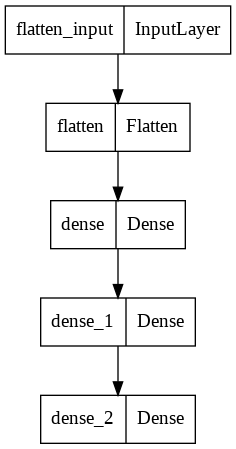

In [16]:
import pydot
keras.utils.plot_model(model)

In [17]:
# accesing the parameters
weights, biases = model.layers[1].get_weights()

In [18]:
weights.shape

(784, 300)

In [19]:
biases.shape

(300,)

### Documentaion

https://keras.io/guides/sequential_model/

In [20]:
# Using back propagation algorithm "sgd"
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [21]:
model_history = model.fit(X_train, y_train, epochs = 30,
                          validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4391 - accuracy: 0.8457 - val_loss: 0.5333 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4123 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3939 - accuracy: 0.8616 - val_loss: 0.3741 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3751 - accuracy: 0.8678 - val_loss: 0.3706 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3630 - accuracy: 0.8715 - val_loss: 0.3621 - val_accuracy

In [22]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

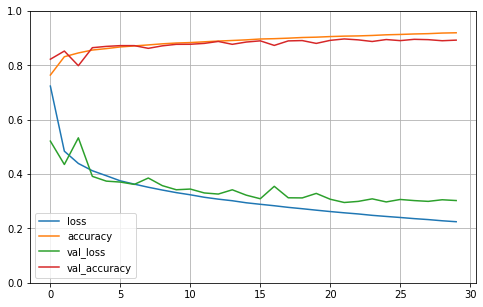

In [23]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
# evaliating the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8820


[0.3366333842277527, 0.8820000290870667]

In [25]:
X_new = X_test[:3]

In [27]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1])

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


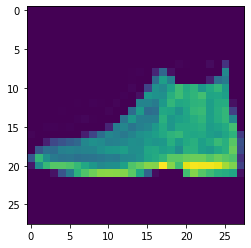

In [34]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


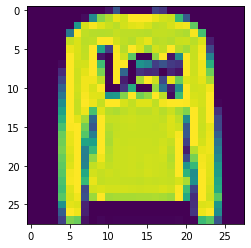

In [35]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


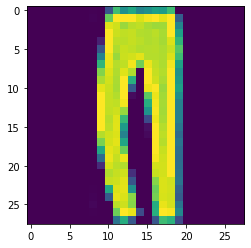

In [36]:
print(plt.imshow(X_test[2]))


# ANN - To predict house prices

In [6]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

* 20640 records
* 8 numeric, predictive attributes and the target
    * Medinc median income in block
    * HouseAge median house age in block
    * AveRooms average number of rooms
    * Population block population
    * AveOccup average house occupation
    * Latitude house block latitude
    * Longitude house block longitude

  The target variable is the median house value in units of 100,000 for California districts.

In [7]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

In [13]:
model = keras.models.Sequential([
     keras.layers.Dense(30, activation="relu", input_shape=[8]),
     keras.layers.Dense(30, activation="relu"),
     keras.layers.Dense(1)                            
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [29]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3973 - mae: 0.4533 - val_loss: 0.3921 - val_mae: 0.4406
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3946 - mae: 0.4510 - val_loss: 0.4173 - val_mae: 0.4453
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3923 - mae: 0.4501 - val_loss: 0.4096 - val_mae: 0.4396
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3899 - mae: 0.4479 - val_loss: 0.4029 - val_mae: 0.4415
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3883 - mae: 0.4468 - val_loss: 0.3863 - val_mae: 0.4372
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3860 - mae: 0.4453 - val_loss: 0.4001 - val_mae: 0.4364
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3846 - mae: 0.4439 - val_loss: 0.3907 - val_mae: 0.4356
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [30]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3658 - mae: 0.4335


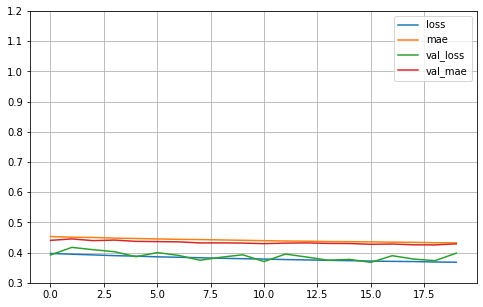

In [31]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.3,1.2)
plt.show()

In [32]:
X_new = X_test[:3]

In [33]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.78466415]
 [1.80867   ]
 [3.7749462 ]]
[0.477   0.458   5.00001]


# Functional API

In [17]:
# Free Keras resources

#del model
#keras.backend.clear_session()

In [18]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [20]:
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(lr=1e-3),
              metrics = ["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [21]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 1.5168 - mae: 0.8752 - val_loss: 0.9366 - val_mae: 0.5924
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6367 - mae: 0.5778 - val_loss: 0.5846 - val_mae: 0.5484
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5888 - mae: 0.5513 - val_loss: 0.5445 - val_mae: 0.5278
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5568 - mae: 0.5354 - val_loss: 0.5262 - val_mae: 0.5136
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5289 - mae: 0.5215 - val_loss: 0.5108 - val_mae: 0.5022
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5083 - mae: 0.5106 - val_loss: 0.4728 - val_mae: 0.4935
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4902 - mae: 0.5019 - val_loss: 0.4553 - val_mae: 0.4814
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [22]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3639 - mae: 0.4264


In [23]:
#model_history.history

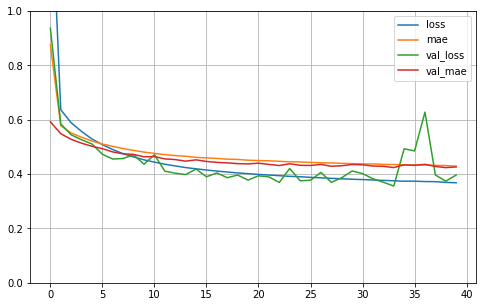

In [24]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

# Saving and restoring

In [ ]:
# give the model a name
model.save("my_Func_model.h5")

In [1]:
%pwd

'/content'

In [ ]:
%cd \\content

In [ ]:
del model

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.load_model("my_Func_model.h5")

In [ ]:
model.summary()

In [ ]:
y_pred = model.predict(X_new)
print(y_pred)

# Using callbacks during Training

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
              keras.layers.Dense(30, activation="relu", input_shape=[8]),
              keras.layers.Dense(30, activation="relu"),
              keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb])

In [ ]:
del model
keras.backend.clear_session()